<a href="https://colab.research.google.com/github/athai16/codepath-prework/blob/main/Copy_of_lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Lab 6

## Outline

Repeat exercises from Lab 5, but with the *SuperStore Retail Orders* dataset


<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Labs/Scripts/lab6_retailer_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Libraries

➡️ Assignment Tasks
- Load any necessary libraries

In [20]:
import pandas as pd
import matplotlib as mpl
import sklearn as sl

## Import Data into Dataframe

➡️ Assignment Tasks
- Import data from the SuperStore retail dataset into a dataframe (in GitHub go to Labs > DataSets)
- Describe or profile the dataframe.  
- If your record count doesn't match the source file, then resolve the issue

In [21]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df = pd.read_csv (r'/content/superstore_retail_orders.csv')

Mounted at /content/gdrive


## Prepare Data

➡️ Assignment Tasks
- Convert any numbers into the correct datatype if they are not already numeric
- Convert any character variables in to factors if they are appropriate for that datatype
- Check for outliers.   Remove any outliers that appear to be mistakes
- Remove rows with empty (NULL) values

In [22]:
#convert the product_price into a number (not a string)

df['product_price'] = pd.to_numeric(df['product_price'].replace('[\$,]', '', regex=True))

df = df.dropna()

#convert the total_amount into a number (not a string)

df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))

df = df.dropna()

print (df)

      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

<ipython-input-22-90df71c6be74>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_amount'] = pd.to_numeric(df['total_amount'].replace('[\$,]', '', regex=True))


In [23]:
# drop null values

import pandas as pd

df.dropna(inplace=True)

In [24]:
# changing order_year_month to datetime format

import pandas as pd

df = pd.DataFrame(df)

df['order_year_month'] = pd.to_datetime(df['order_year_month'])

print(df)


      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

In [25]:
# making new column for total sales using quantity and product_price

import pandas as pd

df = pd.DataFrame(df)

df['total_sales'] = df['quantity'] * df['product_price']

print(df)


      customer_id      customer_name        address_line_1          city  \
0              67      Gordy Matteau   59 Northland Circle    Wilmington   
1             201     Cort Paskerful       769 Buell Drive    Huntsville   
2              45    Willetta Lumley     41 Ridgeway Alley        Irvine   
3             106   Alison Batterton         489 Erie Hill      Richmond   
4             357  Martelle Paxeford  451 Manitowish Place      Richmond   
...           ...                ...                   ...           ...   
9561          240     Barnard Hatley        5541 Kim Alley        Duluth   
9565          370    Darby Tesseyman   7468 Jackson Circle        Albany   
9566          598   Henka De Ferrari    89 Sunnyside Drive  Redwood City   
9567          737    Tommie Penvarne  9630 Washington Hill     Watertown   
9568          482       Matelda Bull    6406 Bultman Alley  Gaithersburg   

      state_province  postal_code  order_id  order_date  customer_id.1  \
0            

## Create Basic Charts

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- Create a bar chart
- Create a histogram
- Create a box plot
- Create a scatter plot
Each visualization should bring some insight into the total sales.

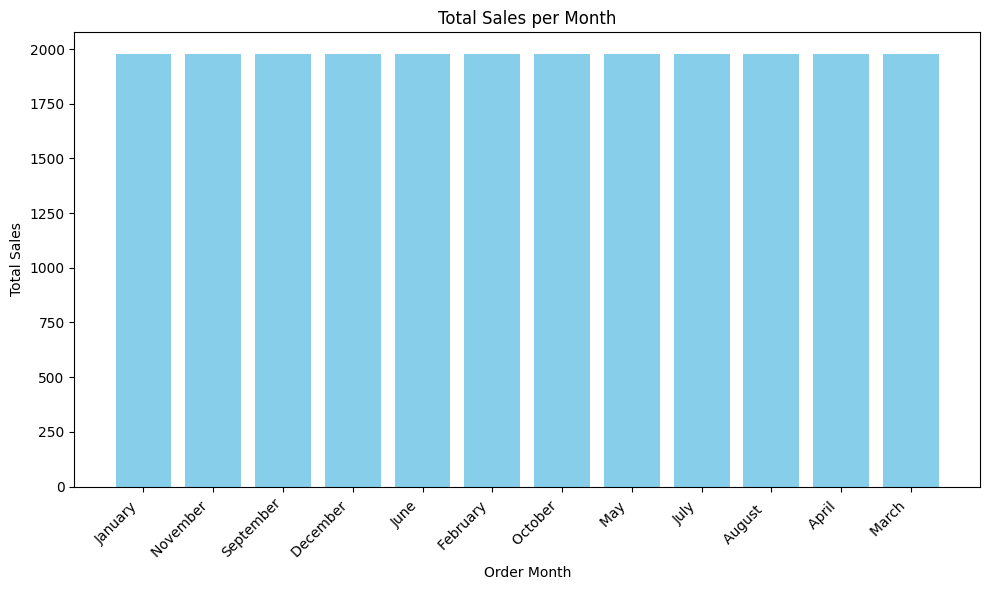

In [26]:
#bar chart

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

plt.figure(figsize=(10, 6))
plt.bar(df['order_month'], df['total_sales'], color='skyblue')

plt.xlabel('Order Month')
plt.ylabel('Total Sales')
plt.title('Total Sales per Month')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


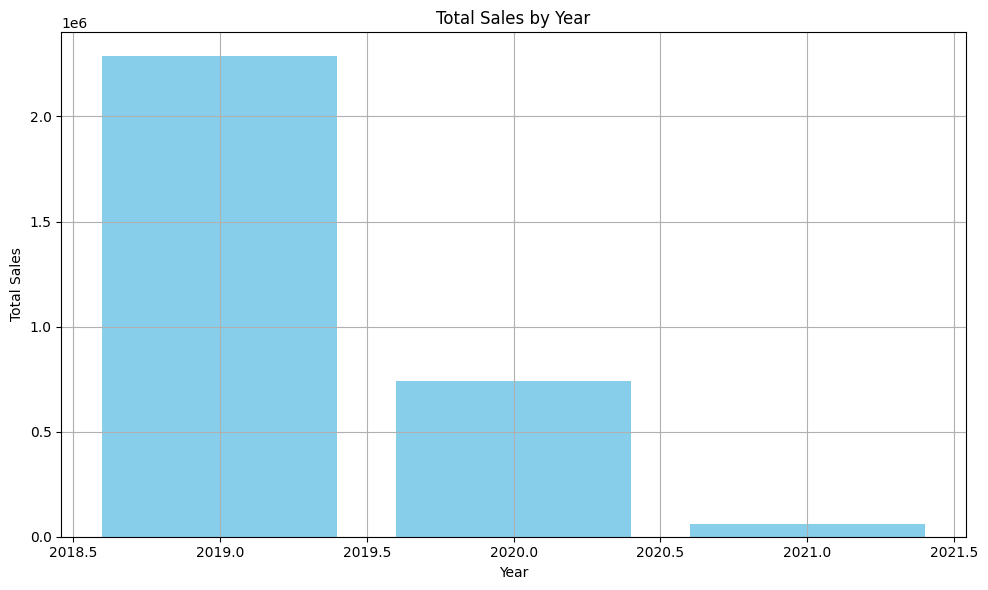

In [27]:
#histogram

import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Extract year and month from order_year_month and create separate columns
df['year'] = pd.to_datetime(df['order_year_month']).dt.year

# Group by year and sum the total sales
sales_by_year = df.groupby('year')['total_sales'].sum().reset_index()

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(sales_by_year['year'], sales_by_year['total_sales'], color='skyblue')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()



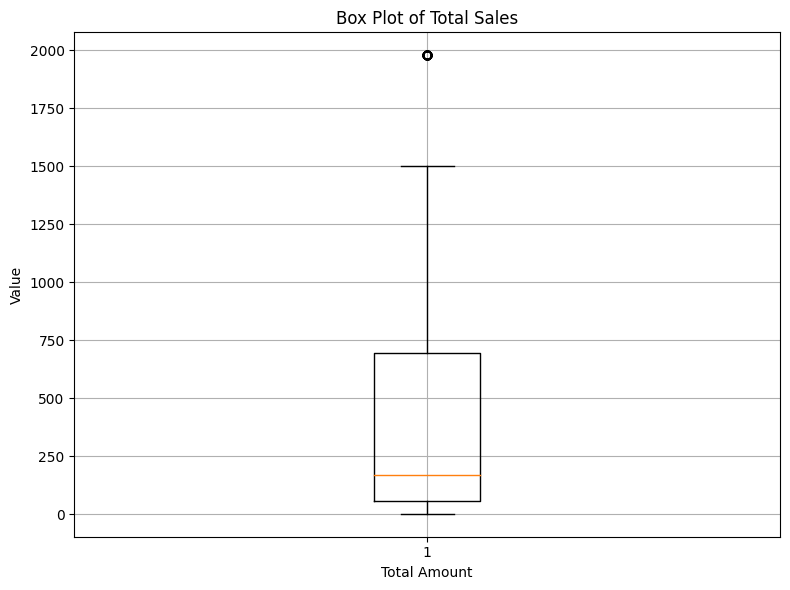

In [28]:
#box plot

import pandas as pd
import matplotlib.pyplot as plt

total_amount_data = df['total_sales']

# Create box plot
plt.figure(figsize=(8, 6))
plt.boxplot(total_amount_data)

# Adding labels and title
plt.xlabel('Total Amount')
plt.ylabel('Value')
plt.title('Box Plot of Total Sales')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


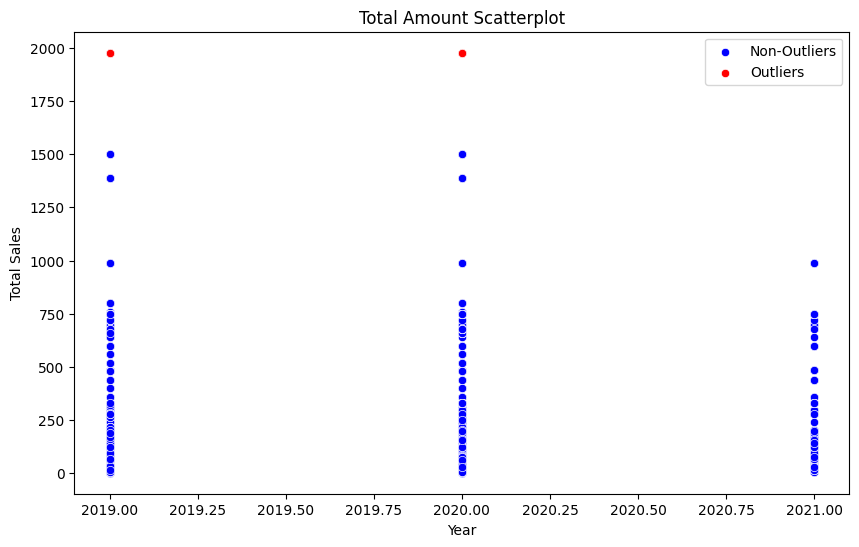

In [29]:
#scatter plot

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Identify outliers
# Use statistical methods such as the interquartile range (IQR) method to detect outliers
Q1 = df['total_sales'].quantile(0.25)
Q3 = df['total_sales'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for 'total_amount'
total_amount_outliers = df[(df['total_sales'] < lower_bound) | (df['total_sales'] > upper_bound)]

# Step 2: Create scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='total_sales', data=df, color='blue', label='Non-Outliers')  # Non-outliers in blue
sns.scatterplot(x='year', y='total_sales', data=total_amount_outliers, color='red', label='Outliers')  # Outliers in red
plt.title('Total Amount Scatterplot')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.legend()
plt.show()



## Explore Relationships

➡️ Assignment Tasks
Your target variable is Total Sales (count of sales)
- How does the month of year affect sales?
- What are the best states for sales?
- What are the best and worst products for sales?

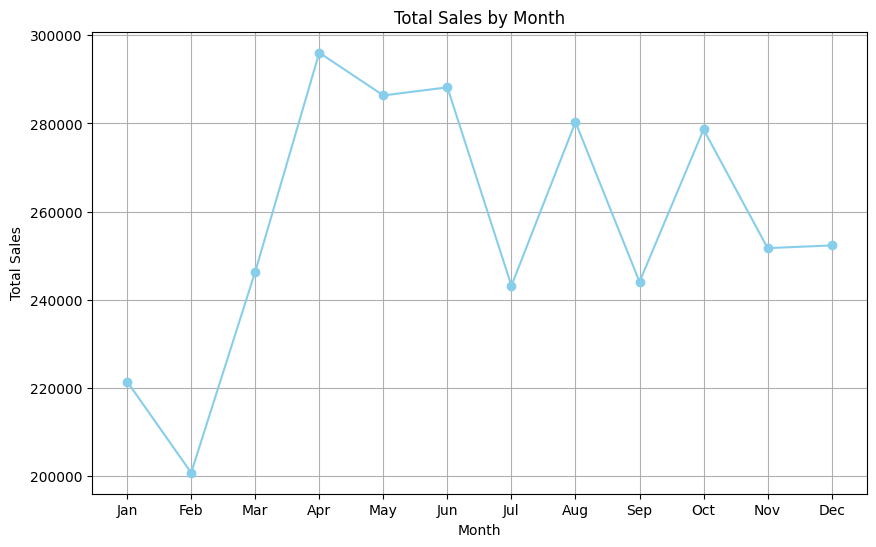

In [30]:
#month of year

import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(df)

# Extract month from order_year_month and create a new column
df['order_month'] = pd.to_datetime(df['order_year_month']).dt.month

# Group by month and calculate total sales for each month
monthly_sales = df.groupby('order_month')['total_sales'].sum()

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales, marker='o', color='skyblue', linestyle='-')
plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()


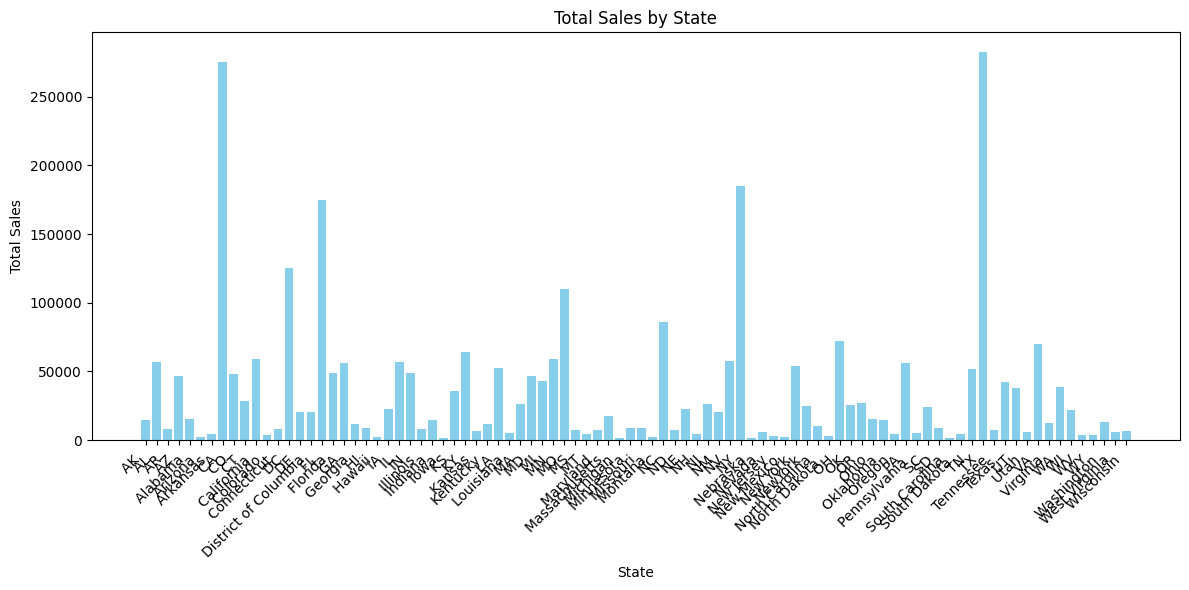

In [32]:
#sales by state

import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(df)

# Group by state and calculate total sales for each state
sales_by_state = df.groupby('state_province')['total_sales'].sum().reset_index()

# Plot the sales data with larger figure size and rotated x-axis labels
plt.figure(figsize=(12, 6))  # Increase the figure width to provide more space for the x-axis labels
plt.bar(sales_by_state['state_province'], sales_by_state['total_sales'], color='skyblue')
plt.title('Total Sales by State')
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


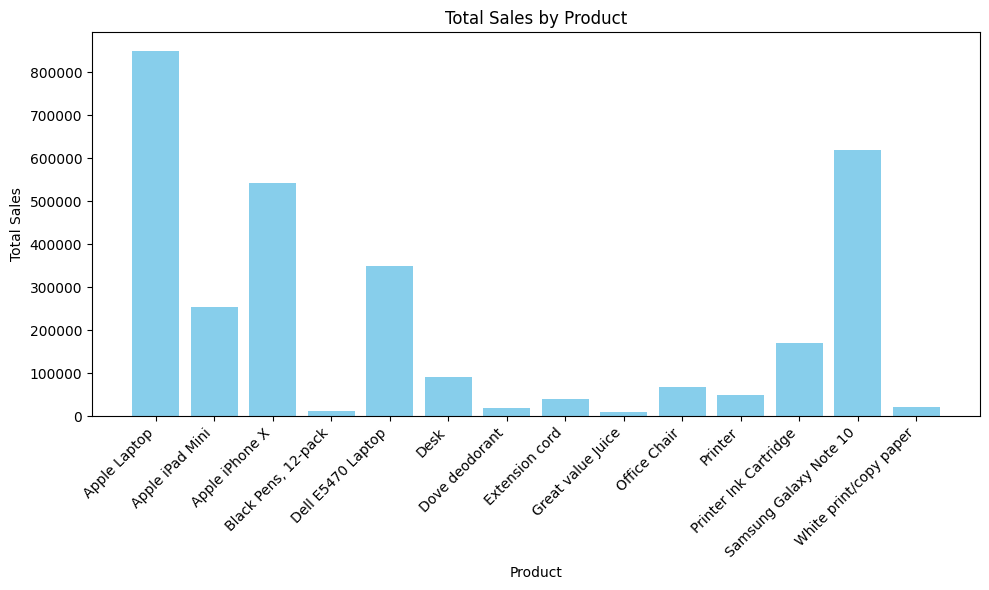

In [33]:
#sales by product

import pandas as pd
import matplotlib.pyplot as plt

# Create DataFrame
df = pd.DataFrame(df)

# Group by product and calculate total sales for each product
sales_by_product = df.groupby('product_name')['total_sales'].sum().reset_index()

# Plot the sales data
plt.figure(figsize=(10, 6))
plt.bar(sales_by_product['product_name'], sales_by_product['total_sales'], color='skyblue')
plt.title('Total Sales by Product')
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Pair Plot

➡️ Assignment Tasks
- Create a pair plot showing any relevant variables, with the color determined by total sales

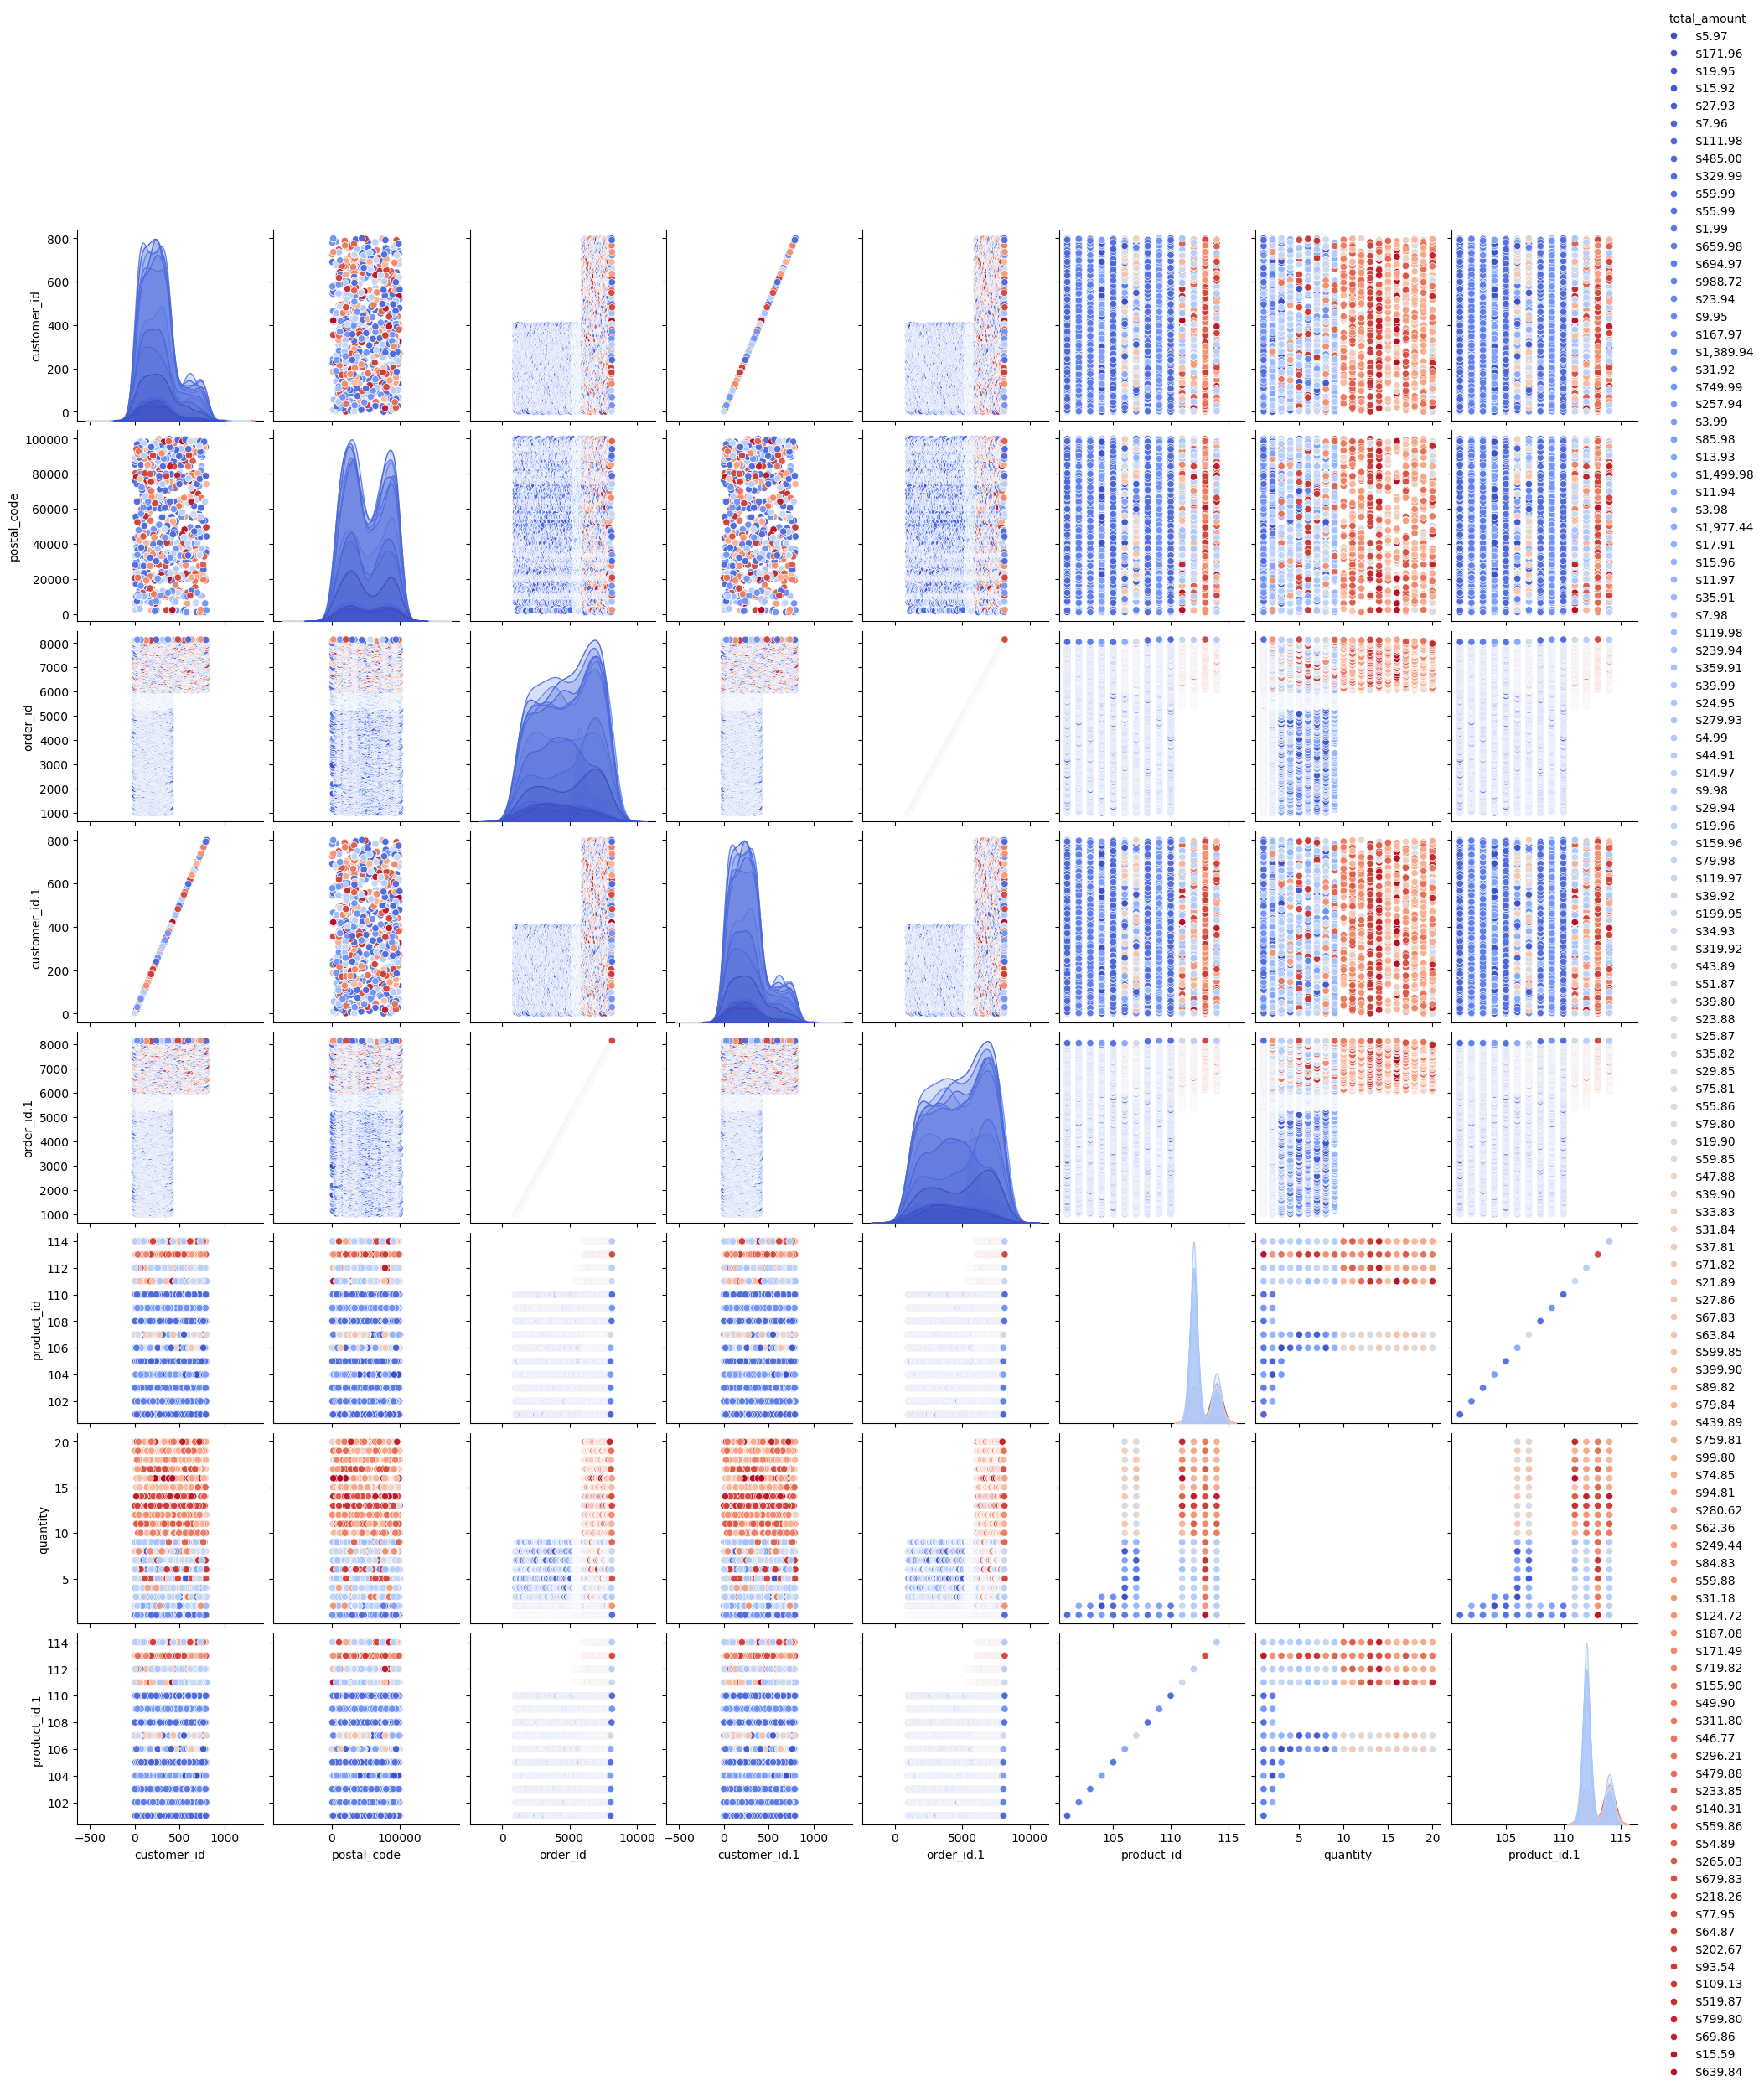

In [36]:
#pair plot

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset using pandas
df = pd.read_csv('/content/superstore_retail_orders.csv')

# Create pairplot
sns.pairplot(df, hue='total_amount', palette='coolwarm')

# Display the plot
plt.show()